# Import Required Packages

In [1]:
import numpy as np
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
num_gpu_available = len(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", num_gpu_available)
assert num_gpu_available==0
print('Tensorflow version:',tf.__version__)
from matplotlib import pyplot as plt
from tqdm import tqdm
import mnist_reader
print('Available devices:', tf.config.list_physical_devices())

Num GPUs Available:  0
Tensorflow version: 2.5.0
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# CPU Info

In [2]:
!lscpu

Architecture:        aarch64
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  1
Core(s) per socket:  4
Socket(s):           1
Vendor ID:           ARM
Model:               1
Model name:          Cortex-A57
Stepping:            r1p1
CPU max MHz:         1479.0000
CPU min MHz:         102.0000
BogoMIPS:            38.40
L1d cache:           32K
L1i cache:           48K
L2 cache:            2048K
Flags:               fp asimd evtstrm aes pmull sha1 sha2 crc32


# Loading the Model

In [3]:
model = tf.keras.models.load_model('float_model.h5')
model.summary()

Model: "regularized_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)    

# Loading the Fashion MNIST Dataset

In [4]:
fashion_mnist_labels = ["T-shirt/top", 
                            "Trouser",
                            "Pullover",
                            "Dress",
                            "Coat",
                            "Sandal", 
                            "Shirt",
                            "Sneaker",
                            "Bag",
                            "Ankle boot"]

In [5]:
x_test,y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [6]:
#feature scaling (Hint:255 is the maximum pixel value)
x_test = x_test/255

num_classes = 10 #no. of classes

test_size = x_test.shape[0]

# Reshaping the data
INPUT_SHAPE = [28,28,1] #input shape for one image

x_test = x_test.reshape([-1]+INPUT_SHAPE)


print(f'Test size: {test_size}')
print(f'Test data shape: {x_test.shape}')


Test size: 10000
Test data shape: (10000, 28, 28, 1)


# Running the Model

In [7]:
num_pics = x_test.shape[0]
prediction = np.zeros((num_pics), dtype = np.uint8)

for i in tqdm(range(num_pics)):
    score = model.predict(np.expand_dims(x_test[i],axis=0)).ravel()
    prediction[i] = score.argmax()
    
print('accuracy:', np.mean(prediction == y_test))

100%|██████████| 10000/10000 [29:16<00:00,  5.69it/s]

accuracy: 0.9186


# Timing Operations

In [8]:
img = np.expand_dims(x_test[0],axis=0)

In [9]:
%%timeit -o -r 1000 -n 1 -q

model.predict(img)

<TimeitResult : 162 ms ± 3.42 ms per loop (mean ± std. dev. of 1000 runs, 1 loop each)>

In [10]:
result = _
print('FPS:',1/np.mean(result.all_runs))

FPS: 6.165268699723537


# Plotting the Result

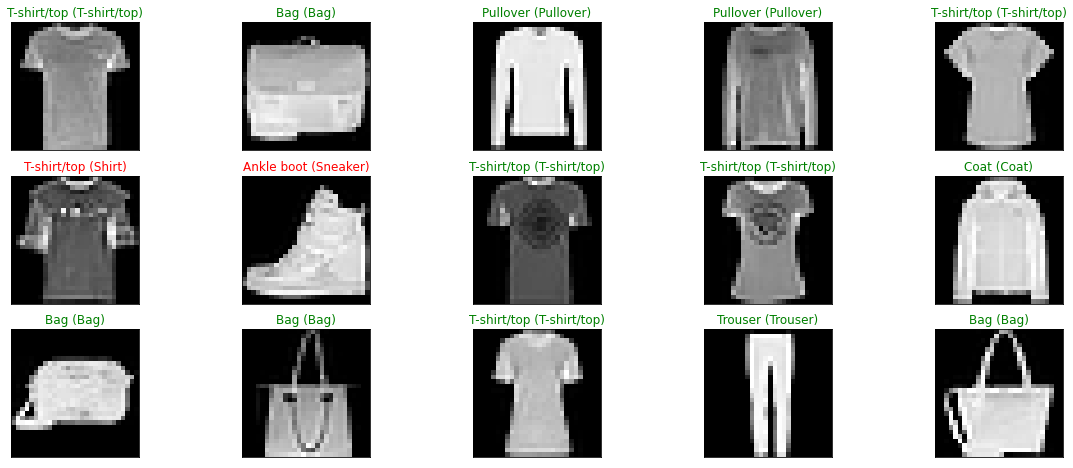

In [11]:
figure = plt.figure(figsize=(20,8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
   
    ax.imshow(x_test[index].reshape(28,28), cmap='gray')
    predict_index = prediction[index]
    true_index = y_test[index]
   
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                fashion_mnist_labels[true_index]),
                color=("green" if predict_index == true_index else "red"))